In [129]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from  matplotlib.colors import ListedColormap
from collections import Counter
import functools


# Exercise 1

In [130]:
def NN(input, output, metric):
    def model(x):
        return output[np.argmin(metric(input - x))]
    
    return model

In [131]:
def euclidean(M):
    return np.linalg.norm(M, axis=1)

with open('athlete-example.csv', newline='') as athlete_example:
    data = np.array(list(csv.reader(athlete_example)))

data = data[1:][:, 1:]

input = data[:, 0:-1].astype(float)
output = data[:, -1]

model = NN(input, output, euclidean)

print(model([6.75, 3])) # is accepted
print(model([9, 9])) # should be accepted but is not

yes
no


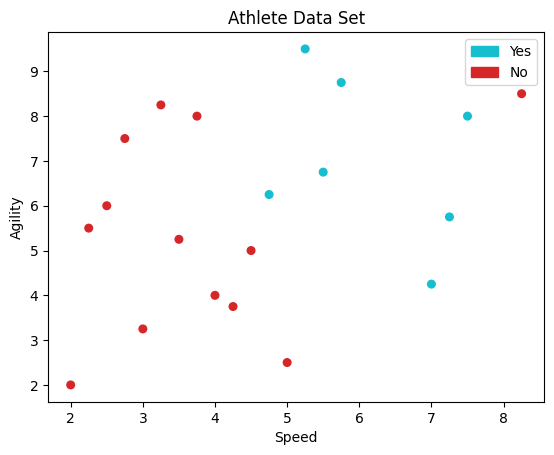

In [132]:
plt.figure()
plt.scatter(
    x=input[:, 0],
    y=input[:, 1],
    c=list(map(lambda x : 1 if x == 'yes' else 0, output)),
    cmap=ListedColormap(['#d62728', '#17becf']),
    s=30
)
plt.xlabel('Speed')
plt.ylabel('Agility')
plt.title('Athlete Data Set')
yes_patch = mpatches.Patch(color='#17becf', label='Yes')
no_patch = mpatches.Patch(color='#d62728', label='No')
plt.legend(handles=[yes_patch, no_patch])
plt.show()

In [133]:
def kNN(input, output, metric, k):
    def model(x):
        return Counter(output[np.argpartition(metric(input - x), k-1)[:k]]).most_common(1)[0][0]

    return model

model = kNN(input, output, euclidean, 3)

print(model([6.75, 3])) # is not accepted
print(model([9, 9])) # is accepted 

no
yes


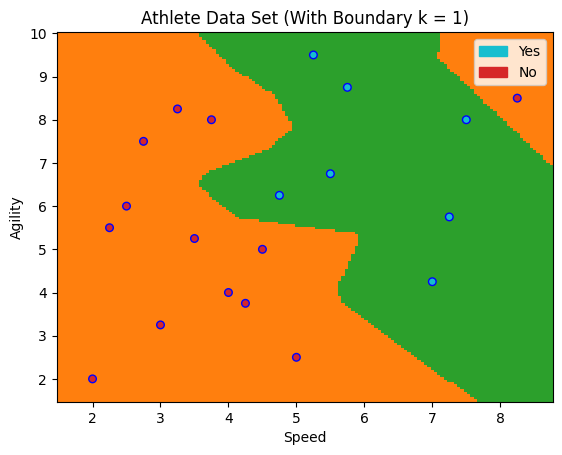

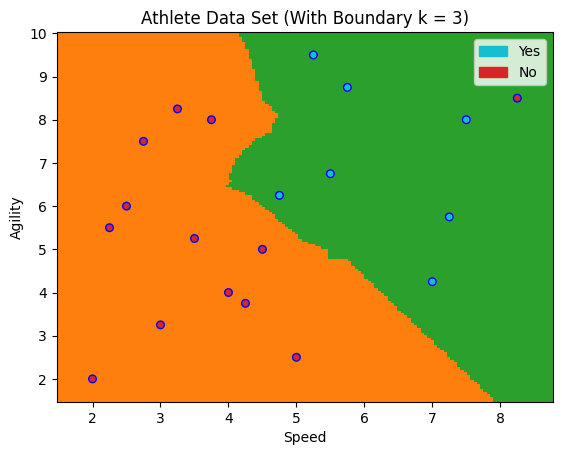

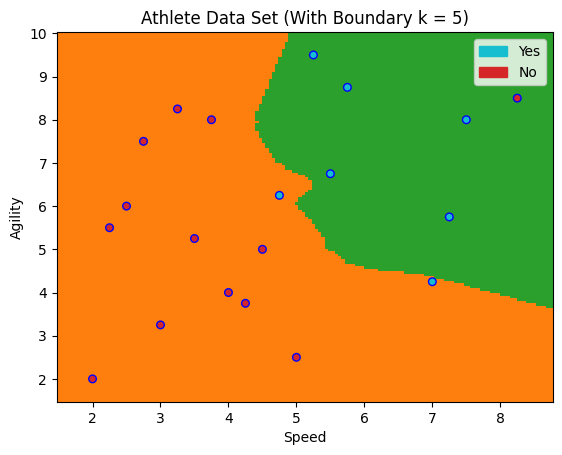

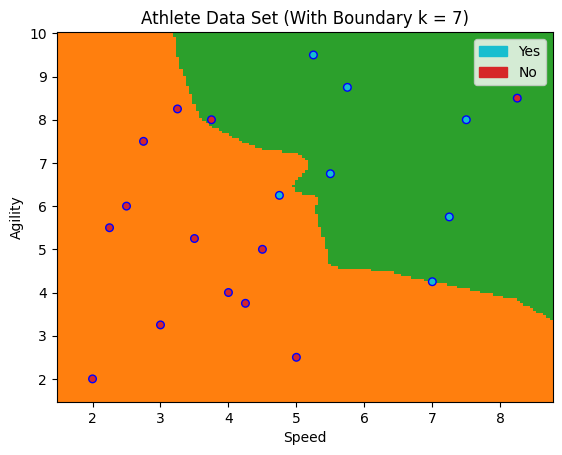

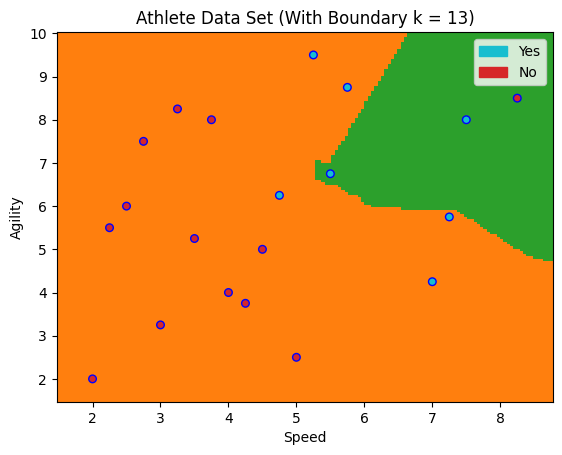

In [134]:
delta = 0.5

min_speed = np.min(input[:,0]) - delta
max_speed = np.max(input[:, 0]) + delta
min_agility = np.min(input[:, 1]) - delta
max_agility = np.max(input[:, 1]) + delta

granularity = 150

speed_axis = np.linspace(min_speed, max_speed, granularity)
agility_axis = np.linspace(min_agility, max_agility, granularity)

speed_matrix, agility_matrix = np.array(np.meshgrid(speed_axis, agility_axis))

def display_decision_boundary(k):
    model = kNN(input, output, euclidean, k)

    color_flag = [[1 if model([speed_matrix[i, j], agility_matrix[i, j]]) == 'yes' else 0 for j in range(granularity)] for i in range(granularity)]

    plt.figure()
    plt.pcolormesh(
        speed_matrix,
        agility_matrix, 
        color_flag,
        cmap=ListedColormap(['#ff7f0e', '#2ca02c'])
    )
    plt.scatter(
        x=input[:, 0],
        y=input[:, 1],
        c=list(map(lambda x : 1 if x == 'yes' else 0, output)),
        edgecolors='b',
        cmap=ListedColormap(['#d62728', '#17becf']),
        s=30
    )
    plt.xlabel('Speed')
    plt.ylabel('Agility')
    plt.title('Athlete Data Set (With Boundary k = ' + str(k) + ')')
    yes_patch = mpatches.Patch(color='#17becf', label='Yes')
    no_patch = mpatches.Patch(color='#d62728', label='No')
    plt.legend(handles=[yes_patch, no_patch])
    plt.show()


display_decision_boundary(1)
display_decision_boundary(3)
display_decision_boundary(5)
display_decision_boundary(7)
display_decision_boundary(13)

# Exercise 2

In [135]:
def kNN_accuracy(train_data, test_data, k):
    model = kNN(train_data[:, :-1].astype(float), train_data[:, -1], euclidean, k)

    total = functools.reduce(
        lambda t, r : t + (1 if r[0] == r[1] else 0),
        zip(
            test_data[:, -1],
            map(model, test_data[:, :-1].astype(float))
        ),
        0
    )

    return float(total) / len(test_data)


np.random.shuffle(data)

split = 16

train_data = data[:split]
test_data = data[split:]

kNN_accuracy(train_data, test_data, 3)

0.75

In [136]:
def jackknifing(data):
    predictions = np.zeros(len(data))

    for i in range(len(data)):
        train_data = np.delete(data, i, axis=0)
        test_data = data[i]

        model = kNN(train_data[:, :-1].astype(float), train_data[:, -1], euclidean, 1)

        prediction = model(test_data[:-1].astype(float))

        predictions[i] = prediction == test_data[-1]

    return predictions

print(jackknifing(data))

[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [137]:
def expectation(A):
    return A.mean()

def variance(A):
    return (A - expectation(A)).mean()

def kNN_variance(k, limit, split, data):
    accuracies = np.zeros(limit)

    for i in range(limit):
        np.random.shuffle(data)
        train_data = data[:split]
        test_data = data[split:]
        accuracies[i] = kNN_accuracy(train_data, test_data, k)

    return variance(accuracies)


In [138]:
print(kNN_variance(1, 50, 16, data))
print(kNN_variance(3, 50, 16, data))

-1.7763568394002505e-17
-8.881784197001253e-18


# Exercise 3

In [149]:
def kNN_regression(input, output, metric, k):
    def model(x):
        return output[np.argpartition(metric(input - x), k-1)[:k]].mean()

    return model

In [150]:
with open('whiskey-example.csv', newline='') as whiskey_example:
    data = np.array(list(csv.reader(whiskey_example)))

data = data[1:][:, 1:].astype(float)

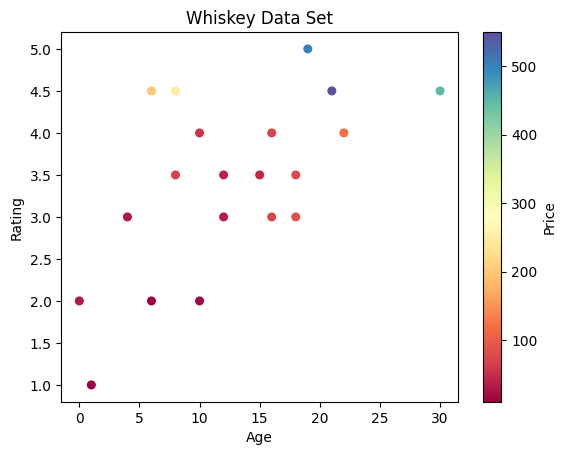

In [151]:
input = data[:, :-1]
output = data[:, -1]

plt.figure()
plt.scatter(
    x=input[:, 0],
    y=input[:, 1],
    c=output,
    cmap="Spectral",
    s=30
)
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Whiskey Data Set')
plt.colorbar().set_label("Price")
plt.show()

In [152]:
model = kNN_regression(input, output, euclidean, 3)

print(model(input[0]))

23.333333333333332


In [153]:
def mean_square_error(y, y_hat):
    return ((y - y_hat)**2).mean()

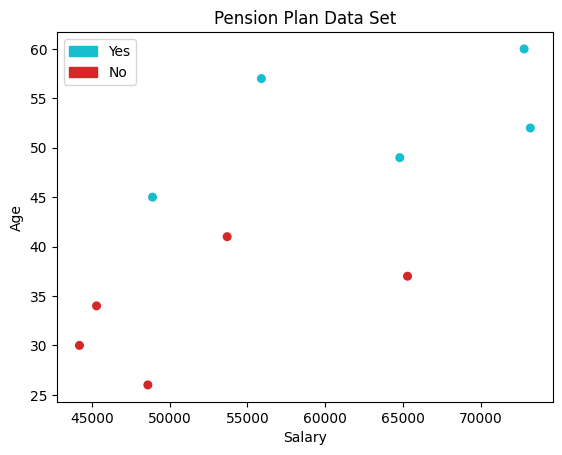

In [154]:
with open('pension-example.csv', newline='') as pension_example:
    data = np.array(list(csv.reader(pension_example)))

data = data[1:][:, 1:]

input = data[:, 0:-1].astype(float)
output = data[:, -1]

plt.figure()
plt.scatter(
    x=input[:, 0],
    y=input[:, 1],
    c=list(map(lambda x : 1 if x == 'yes' else 0, output)),
    cmap=ListedColormap(['#d62728', '#17becf']),
    s=30
)
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('Pension Plan Data Set')
yes_patch = mpatches.Patch(color='#17becf', label='Yes')
no_patch = mpatches.Patch(color='#d62728', label='No')
plt.legend(handles=[yes_patch, no_patch])
plt.show()

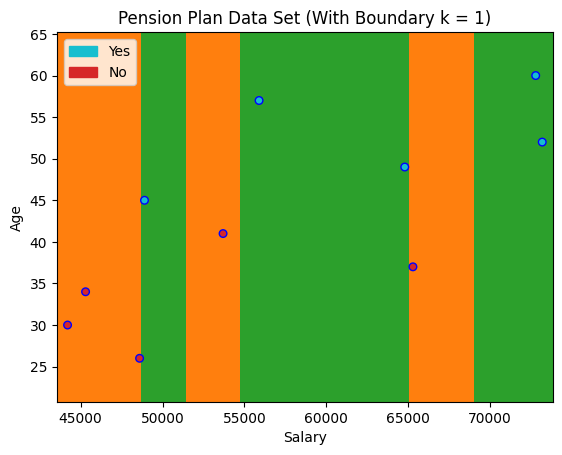

In [155]:
delta_salary = 500
delta_age = 5

min_salary = np.min(input[:,0]) - delta_salary
max_salary = np.max(input[:, 0]) + delta_salary
min_age = np.min(input[:, 1]) - delta_age
max_age = np.max(input[:, 1]) + delta_age

granularity = 100

salary_axis = np.linspace(min_salary, max_salary, granularity)
age_axis = np.linspace(min_age, max_age, granularity)

salary_matrix, age_matrix = np.array(np.meshgrid(salary_axis, age_axis))

def display_decision_boundary_for_ex3(k):
    model = kNN(input, output, euclidean, k)

    color_flag = [[1 if model([salary_matrix[i, j], age_matrix[i, j]]) == 'yes' else 0 for j in range(granularity)] for i in range(granularity)]

    plt.figure()
    plt.pcolormesh(
        salary_matrix,
        age_matrix, 
        color_flag,
        cmap=ListedColormap(['#ff7f0e', '#2ca02c'])
    )
    plt.scatter(
        x=input[:, 0],
        y=input[:, 1],
        c=list(map(lambda x : 1 if x == 'yes' else 0, output)),
        edgecolors='b',
        cmap=ListedColormap(['#d62728', '#17becf']),
        s=30
    )
    plt.xlabel('Salary')
    plt.ylabel('Age')
    plt.title('Pension Plan Data Set (With Boundary k = ' + str(k) + ')')
    yes_patch = mpatches.Patch(color='#17becf', label='Yes')
    no_patch = mpatches.Patch(color='#d62728', label='No')
    plt.legend(handles=[yes_patch, no_patch])
    plt.show()

display_decision_boundary_for_ex3(1)

As one can see due to the fact that the data is not scaled properly this results in unexpected boundaries. Hence, data *normalization* is crucial to give us the boundary condition we would expect.

In [156]:
def normalize(input):
    for i in range(input.shape[1]):
        m = 2/(np.max(input[:, i]) - np.min(input[:, i]))
        c = 1 - m * np.max(input[:, i])
        input[:, i] = m * input[:, i] + c
    
    return input

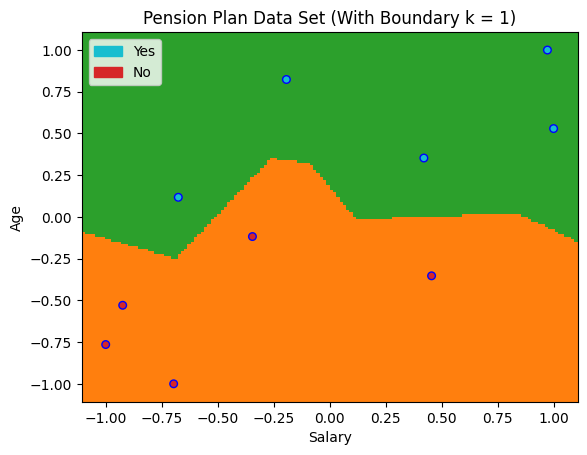

In [157]:
input = normalize(input)

delta_salary = 0.1
delta_age = 0.1

min_salary = np.min(input[:,0]) - delta_salary
max_salary = np.max(input[:, 0]) + delta_salary
min_age = np.min(input[:, 1]) - delta_age
max_age = np.max(input[:, 1]) + delta_age

granularity = 150

salary_axis = np.linspace(min_salary, max_salary, granularity)
age_axis = np.linspace(min_age, max_age, granularity)

salary_matrix, age_matrix = np.array(np.meshgrid(salary_axis, age_axis))

def display_decision_boundary_for_ex3(k):
    model = kNN(input, output, euclidean, k)

    color_flag = [[1 if model([salary_matrix[i, j], age_matrix[i, j]]) == 'yes' else 0 for j in range(granularity)] for i in range(granularity)]

    plt.figure()
    plt.pcolormesh(
        salary_matrix,
        age_matrix, 
        color_flag,
        cmap=ListedColormap(['#ff7f0e', '#2ca02c'])
    )
    plt.scatter(
        x=input[:, 0],
        y=input[:, 1],
        c=list(map(lambda x : 1 if x == 'yes' else 0, output)),
        edgecolors='b',
        cmap=ListedColormap(['#d62728', '#17becf']),
        s=30
    )
    plt.xlabel('Salary')
    plt.ylabel('Age')
    plt.title('Pension Plan Data Set (With Boundary k = ' + str(k) + ')')
    yes_patch = mpatches.Patch(color='#17becf', label='Yes')
    no_patch = mpatches.Patch(color='#d62728', label='No')
    plt.legend(handles=[yes_patch, no_patch])
    plt.show()

display_decision_boundary_for_ex3(1)